In [15]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.api as stat
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import adfuller

In [16]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [17]:
def plot(serie, st):
    plt.figure(figsize=(10,4))
    plt.plot(serie)
    plt.title(st + ' Process', fontsize=18)

In [18]:
# Define list of tickers
tickers_list = ['NKE', 'NKE']

# Store the list in a Dataframe
data = pd.DataFrame(columns=tickers_list)

In [19]:
# Fetch the data
for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2021-07-01','2022-07-01')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [20]:
# Perform ADF test on the closing prices of fetched data
result = stat.OLS(data['NKE'], data['NKE']).fit()
plot(result.resid, 'Non-stationary A(B)')

KeyError: 'ZYNE'

In [ ]:
perform_adf_test(result.resid)

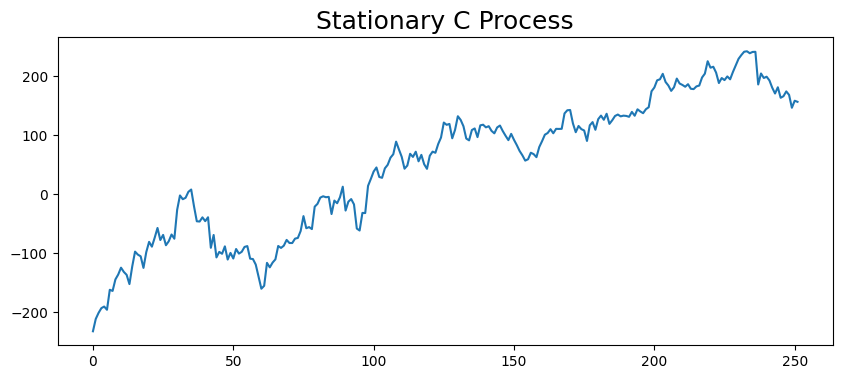

In [87]:
new_nke_val = np.array(data['NKE'].tolist()) * np.array([3])
new_zyne_val = np.array(data['ZYNE'].tolist()) * np.array([-1])
third = stat.OLS(np.array(new_nke_val), np.array(new_zyne_val)).fit()

plot(third.resid, 'Stationary C')

In [82]:
perform_adf_test(third.resid)

ADF Statistic: -2.096119
p-value: 0.246078
